In [45]:
import pandas as pd
import numpy as np

Load dataset

In [46]:
df = pd.read_csv('dairy_dataset.csv')

# Data Understanding

In [47]:
df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


About Dataset:


The Dairy Goods Sales Dataset provides a detailed and comprehensive collection of data related to dairy farms, dairy products, sales, and inventory management. This dataset encompasses a wide range of information, including farm location, land area, cow population, farm size, production dates, product details, brand information, quantities, pricing, shelf life, storage conditions, expiration dates, sales information, customer locations, sales channels, stock quantities, stock thresholds, and reorder quantities.

Features:
- Location: The geographical location of the dairy farm.
- Total Land Area (acres): The total land area occupied by the dairy farm.
- Number of Cows: The number of cows present in the dairy farm.
- Farm Size: The size of the dairy farm(in sq.km).
- Date: The date of data recording.
- Product ID: The unique identifier for each dairy product.
- Product Name: The name of the dairy product.
- Brand: The brand associated with the dairy product.
- Quantity (liters/kg): The quantity of the dairy product available.
- Price per Unit: The price per unit of the dairy product.
- Total Value: The total value of the available quantity of the dairy product.
- Shelf Life (days): The shelf life of the dairy product in days.
- Storage Condition: The recommended storage condition for the dairy product.
- Production Date: The date of production for the dairy product.
- Expiration Date: The date of expiration for the dairy product.
- Quantity Sold (liters/kg): The quantity of the dairy product sold.
- Price per Unit (sold): The price per unit at which the dairy product was sold.
- Approx. Total Revenue (INR): The approximate total revenue generated from the sale of the dairy product.
- Customer Location: The location of the customer who purchased the dairy product.
- Sales Channel: The channel through which the dairy product was sold (Retail, Wholesale, Online).
- Quantity in Stock (liters/kg): The quantity of the dairy product remaining in stock.
- Minimum Stock Threshold (liters/kg): The minimum stock threshold for the dairy product.
- Reorder Quantity (liters/kg): The recommended quantity to reorder for the dairy product.

In [48]:
df['Brand'].value_counts()

Amul                    1053
Mother Dairy            1010
Raj                      685
Sudha                    648
Dodla Dairy              222
Palle2patnam             211
Dynamix Dairies          106
Warana                   104
Parag Milk Foods         102
Passion Cheese            96
Britannia Industries      88
Name: Brand, dtype: int64

**Problem!!**

We're trying to predict the ‘Price per Unit (sold)’ of one brand, which could help determine the optimal price for maximizing revenue, profit, or another business objective.

Price optimization involves using data analysis to determine how customers will respond to different prices for products and services. It’s often used to adjust prices in response to various factors like demand, inventory, and competition

In this case, we're using features like ‘Quantity (liters/kg)’, and others to predict the ‘Price per Unit (sold)’. This model could potentially be used to optimize pricing decisions based on these factors.

# Focus on 'Mother Diary' Brand

Yang perlu ada di eda section MOTHER DIARY:

-. barplot (product name, sales channel,farm size, dan location)

-. bisa juga buat graph penjualan disetiap location

-. cari juga min max location yang klo di sum profitnya paling dikit

-. info mengenai total_value vs approx_rev (jatohnya rugi/melesetnya sejauh apa)

-. cari product dengan penjualan terbanyak

-. yang lain terserah kalian

Creates a new DataFrame (df_new2) that includes only the rows where the 'Brand' is 'Mother Dairy'

In [49]:
df_new2 = df.loc[df['Brand'] == 'Mother Dairy']

Check the updated dataframe

In [50]:
df_new2.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
7,Bihar,67.61,77,Medium,2019-02-14,9,Paneer,Mother Dairy,203.36,29.08,...,2019-01-06,2019-01-20,15,29.09,436.35,Haryana,Online,188,10.90,25.14
9,Telangana,413.24,36,Large,2022-03-04,8,Buttermilk,Mother Dairy,385.64,42.08,...,2022-02-03,2022-02-12,108,46.15,4984.20,Tamil Nadu,Retail,277,93.61,66.26
13,Telangana,856.00,39,Large,2019-12-26,5,Ice Cream,Mother Dairy,612.16,94.43,...,2019-12-15,2020-01-09,80,94.32,7545.60,Madhya Pradesh,Online,532,47.95,198.99
15,Kerala,14.97,71,Small,2020-02-22,1,Milk,Mother Dairy,821.52,11.58,...,2020-01-31,2020-02-01,778,8.69,6760.82,Gujarat,Retail,43,89.45,28.11


Count the occurrences of each unique value in the 'Product Name' column within the DataFrame df_new2.

In [51]:
df_new2['Product Name'].value_counts()

Paneer        119
Curd          119
Buttermilk    118
Milk          117
Butter        117
Ice Cream     112
Lassi         107
Ghee          104
Yogurt         97
Name: Product Name, dtype: int64

Count the occurrences of each unique value in the 'Sales Channel' column within the DataFrame df_new2.

In [52]:
df_new2['Sales Channel'].value_counts()

Retail       338
Online       336
Wholesale    336
Name: Sales Channel, dtype: int64

Drop or remove a list of specified columns from the DataFrame df_new2, this can be useful cause we want to focus on a subset of columns in our DataFrame and exclude others that are not relevant for analysis or processing.

In [53]:
drop_columns = ['Total Land Area (acres)', 'Number of Cows', 'Brand',
                'Reorder Quantity (liters/kg)', 'Shelf Life (days)', 'Minimum Stock Threshold (liters/kg)',
                'Product Name', 'Quantity in Stock (liters/kg)','Location','Production Date','Expiration Date']

# Production Date,Price per Unit, Expiration Date, Approx. Total Revenue(INR), Total Value
df_new2.drop(columns=drop_columns, inplace=True)

<ipython-input-53-a769b6cb9e58>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2.drop(columns=drop_columns, inplace=True)


Check the updated dataframe

In [54]:
df_new2.head()

,Farm Size,Date,Product ID,Quantity (liters/kg),Price per Unit,Total Value,Storage Condition,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel
4,Medium,2020-12-14,8,147.77,83.85,12390.5145,Refrigerated,145,83.07,12045.15,Jharkhand,Retail
7,Medium,2019-02-14,9,203.36,29.08,5913.7088,Refrigerated,15,29.09,436.35,Haryana,Online
9,Large,2022-03-04,8,385.64,42.08,16227.7312,Refrigerated,108,46.15,4984.20,Tamil Nadu,Retail
13,Large,2019-12-26,5,612.16,94.43,57806.2688,Frozen,80,94.32,7545.60,Madhya Pradesh,Online
15,Small,2020-02-22,1,821.52,11.58,9513.2016,Polythene Packet,778,8.69,6760.82,Gujarat,Retail


Used to filter the DataFrame df_new2 to select rows where the 'Product ID' column has a value of 1 which is 'Milk'.

In [55]:
df_new2[df_new2['Product ID'] == 1 ]

,Farm Size,Date,Product ID,Quantity (liters/kg),Price per Unit,Total Value,Storage Condition,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel
15,Small,2020-02-22,1,821.52,11.58,9513.2016,Polythene Packet,778,8.69,6760.82,Gujarat,Retail
65,Medium,2021-11-07,1,62.79,95.03,5966.9337,Tetra Pack,16,93.22,1491.52,Bihar,Wholesale
111,Large,2019-01-26,1,86.33,48.91,4222.4003,Tetra Pack,84,45.16,3793.44,Rajasthan,Online
147,Large,2022-11-21,1,448.09,75.81,33969.7029,Polythene Packet,329,71.75,23605.75,Haryana,Wholesale
226,Large,2020-07-15,1,946.88,65.09,61632.4192,Polythene Packet,658,69.31,45605.98,Bihar,Wholesale
...,...,...,...,...,...,...,...,...,...,...,...,...
4217,Medium,2021-11-03,1,97.27,92.40,8987.7480,Tetra Pack,5,97.15,485.75,Chandigarh,Wholesale
4247,Medium,2021-03-08,1,605.55,66.47,40250.9085,Tetra Pack,310,65.99,20456.90,Rajasthan,Wholesale
4258,Large,2020-01-10,1,564.27,46.69,26345.7663,Tetra Pack,359,42.55,15275.45,Delhi,Online
4299,Small,2020-04-08,1,101.64,51.16,5199.9024,Polythene Packet,27,50.99,1376.73,Chandigarh,Online


Convert the 'Date' column in the DataFrame df_new2 into datetime format

In [56]:
df_new2['Date'] = pd.to_datetime(df_new2['Date'])

<ipython-input-56-87d8bdf3d129>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2['Date'] = pd.to_datetime(df_new2['Date'])


Import the library/tools to perform various machine learning tasks, including data splitting, linear regression, decision tree regression, and k-nearest neighbors regression. These models can be used for tasks such as prediction and modeling relationships in your data.

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

Before proceeding to the modeling phase, it's essential to determine and understand the nature or characteristics of the dataset include the null values and data type.

In [58]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 4 to 4324
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Farm Size                   1010 non-null   object        
 1   Date                        1010 non-null   datetime64[ns]
 2   Product ID                  1010 non-null   int64         
 3   Quantity (liters/kg)        1010 non-null   float64       
 4   Price per Unit              1010 non-null   float64       
 5   Total Value                 1010 non-null   float64       
 6   Storage Condition           1010 non-null   object        
 7   Quantity Sold (liters/kg)   1010 non-null   int64         
 8   Price per Unit (sold)       1010 non-null   float64       
 9   Approx. Total Revenue(INR)  1010 non-null   float64       
 10  Customer Location           1010 non-null   object        
 11  Sales Channel               1010 non-null   object      

In [59]:
df_new2.isna().sum()

Farm Size                     0
Date                          0
Product ID                    0
Quantity (liters/kg)          0
Price per Unit                0
Total Value                   0
Storage Condition             0
Quantity Sold (liters/kg)     0
Price per Unit (sold)         0
Approx. Total Revenue(INR)    0
Customer Location             0
Sales Channel                 0
dtype: int64

Indicates the dataset doesn't contain any null values, so we don't need to treat null and continue to build the model.

# Feature Engineering and Model

Because our dataset includes categorical variables, we have chosen to encode them before feeding the data to the model. This is the two techniques that we use to handle this problem:

-. One-Hot Encoding: This method is suitable for nominal variables, i.e., variables where there is no order or priority. This could be applied to ‘Customer_Location’, and ‘Sales Channel’.

-. Ordinal Encoding: This method is suitable for ordinal variables, i.e., variables that have some order. For example, if ‘Farm Size’ has an order (like Small < Medium < Large), then it can be encoded with corresponding ordinal numbers like 1, 2, 3

In [60]:
# One-Hot Encoding
df_new2 = pd.get_dummies(df_new2, columns=['Customer Location', 'Sales Channel','Storage Condition'])

In [61]:
# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Small', 'Medium', 'Large']])
df_new2['Farm Size'] = ordinal_encoder.fit_transform(df_new2[['Farm Size']])

Check the encode works or not

In [62]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 4 to 4324
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Farm Size                           1010 non-null   float64       
 1   Date                                1010 non-null   datetime64[ns]
 2   Product ID                          1010 non-null   int64         
 3   Quantity (liters/kg)                1010 non-null   float64       
 4   Price per Unit                      1010 non-null   float64       
 5   Total Value                         1010 non-null   float64       
 6   Quantity Sold (liters/kg)           1010 non-null   int64         
 7   Price per Unit (sold)               1010 non-null   float64       
 8   Approx. Total Revenue(INR)          1010 non-null   float64       
 9   Customer Location_Bihar             1010 non-null   uint8         
 10  Customer Location_Chandi

# 1st Model

Creates a new DataFrame 'X' by dropping 4 columns, 'Date', 'Price per Unit (sold), 'Total Value', and 'Approx. Total Revenue(INR) from the DataFrame df_new2. The resulting DataFrame X will contain the features (independent variables) for our model also creates a pandas Series 'y' by selecting the 'Price per Unit (sold)' column from the DataFrame df_new2. The Series y will contain the target variable (the variable you want to predict) for our model.

In [63]:
X = df_new2.drop(columns = ['Date', 'Price per Unit (sold)', 'Total Value', 'Approx. Total Revenue(INR)'])
y = df_new2['Price per Unit (sold)']

splits your data into training and testing sets using the train_test_split with specifies that 20% of the data will be used as the testing set, while the remaining 80% will be used as the training set.

In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Check the characteristics of 'X'

In [65]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 4 to 4324
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Farm Size                           1010 non-null   float64
 1   Product ID                          1010 non-null   int64  
 2   Quantity (liters/kg)                1010 non-null   float64
 3   Price per Unit                      1010 non-null   float64
 4   Quantity Sold (liters/kg)           1010 non-null   int64  
 5   Customer Location_Bihar             1010 non-null   uint8  
 6   Customer Location_Chandigarh        1010 non-null   uint8  
 7   Customer Location_Delhi             1010 non-null   uint8  
 8   Customer Location_Gujarat           1010 non-null   uint8  
 9   Customer Location_Haryana           1010 non-null   uint8  
 10  Customer Location_Jharkhand         1010 non-null   uint8  
 11  Customer Location_Karnataka         1010 no

Create instances of the three regression models and Fitting the models to the training data:
1. model for linear regression
2. model for decision tree regression
3. model for k-nearest neighbors regression

In [66]:
model = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = KNeighborsRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

KNeighborsRegressor()

Using three different regression models (model, model2, and model3) to make predictions on the testing data (X_test) and storing the predictions in y_pred1, y_pred2, and y_pred3.

In [67]:
y_pred1 = model.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

# 1st Evaluation

We evaluate the performance of three different regression models using five different metrics:
- Mean Absolute Error (MAE): This is the average of the absolute differences between the predicted and actual values. It gives an idea of how wrong the predictions were. The measure gives an equal weight to all errors, regardless of their direction (positive or negative errors).
- Mean Squared Error (MSE): This is similar to MAE but squares the differences before they are averaged. This means larger errors are noted more than with MAE, making MSE more useful when larger errors are particularly undesirable.
- Mean Absolute Percentage Error (MAPE): This is the average of the absolute percentage differences between the predicted and actual values. It gives an idea of the error in terms of the percentage of the actual value.
- Root Mean Squared Error (RMSE): This is the square root of MSE. It measures the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are.
- R-squared (R²): This is a statistical measure that represents the proportion of the variance for a dependent variable that’s explained by an independent variable or variables in a regression model.

The advantage of using these metrics together is that they provide a comprehensive view of the model performance. While R² gives us an idea about how well our model fits the data, MAE, MSE, RMPE, and MAPE give us insight into how much our predictions deviate, on average, from the actual values in the dataset. This can help us choose the best model for our needs.

How it measure:
- Lower MAE indicates better accuracy.,
- Lower MSE indicates better accuracy.
- Lower MAPE is desirable, indicating a smaller percentage error.,
- Lower RMSE suggests better accuracy.
- R² close to 1 indicates a good fit.

In [68]:
from sklearn import metrics
import numpy as np

# Define the models and their names
models = [y_pred1, y_pred2, y_pred3]
model_names = ["Linear Regression Model", "Decision Tree Regression Model", "K-Nearest Neighbors Regression Model"]

# Define the metrics
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

metrics_funcs = [metrics.mean_absolute_error, metrics.mean_squared_error, mean_absolute_percentage_error, np.sqrt, metrics.r2_score]
metrics_names = ["MAE", "MSE", "MAPE", "RMSE", "R-squared (R²)"]

# Calculate and print the metrics for each model
for model, name in zip(models, model_names):
    print(name + ":")
    for func, metric in zip(metrics_funcs, metrics_names):
        if metric == "RMSE":
            print(metric + ":", func(metrics.mean_squared_error(y_test, model)))
        else:
            print(metric + ":", func(y_test, model))
    print()


Linear Regression Model:
MAE: 2.5207732196339814
MSE: 8.689772501089823
MAPE: 6.6052181717005105
RMSE: 2.9478420074844283
R-squared (R²): 0.9868383491952721

Decision Tree Regression Model:
MAE: 3.6151485148514864
MSE: 19.546950495049508
MAPE: 9.48031224298915
RMSE: 4.42119333382397
R-squared (R²): 0.9703939157577626

K-Nearest Neighbors Regression Model:
MAE: 9.85707920792079
MSE: 157.10684584158417
MAPE: 29.315831410864657
RMSE: 12.534226974232762
R-squared (R²): 0.7620437768952166



Evaluation Analysis:
- The Linear Regression model performs exceptionally well, with low MAE, MSE, MAPE, RMSE, and a high R-squared value, indicating a strong linear relationship between features and the target variable.
- The Decision Tree Regression model performs reasonably well but has slightly higher errors and a lower R-squared value compared to Linear Regression.
- The K-Nearest Neighbors model shows the highest errors and the lowest R-squared value, suggesting a weaker fit and lower accuracy compared to the other two models.

In summary, based on these metrics, the Linear Regression model appears to be the most accurate and provides the best fit for the data. However, the choice of the best model also depends on the specific requirements and characteristics of your dataset and problem. It's essential to consider both the numerical metrics and the context when selecting the most suitable model.

Correlation check

In [69]:
correlations = X.corrwith(y)
correlations

Farm Size                             0.013803
Product ID                           -0.010652
Quantity (liters/kg)                  0.013864
Price per Unit                        0.994065
Quantity Sold (liters/kg)             0.013182
Customer Location_Bihar              -0.027100
Customer Location_Chandigarh          0.028643
Customer Location_Delhi              -0.034500
Customer Location_Gujarat            -0.020117
Customer Location_Haryana             0.005636
Customer Location_Jharkhand           0.021236
Customer Location_Karnataka          -0.016722
Customer Location_Kerala              0.043099
Customer Location_Madhya Pradesh     -0.036278
Customer Location_Maharashtra         0.025308
Customer Location_Rajasthan          -0.029824
Customer Location_Tamil Nadu         -0.001364
Customer Location_Telangana          -0.027519
Customer Location_Uttar Pradesh       0.019326
Customer Location_West Bengal         0.055032
Sales Channel_Online                  0.014315
Sales Channel

Here's how to interpret this output:

- Positive Correlation: Features with positive correlation coefficients (e.g., values close to 1) have a positive linear relationship with the target variable. As these features increase, the 'Price per Unit (sold)' tends to increase.
- Negative Correlation: Features with negative correlation coefficients (e.g., values close to -1) have a negative linear relationship with the target variable. As these features increase, the 'Price per Unit (sold)' tends to decrease.
- Weak Correlation: Features with correlation coefficients close to 0 have a weak linear relationship with the target variable.

Key takeaways from the output:
- 'Price per Unit' itself has a strong positive correlation with 'Price per Unit (sold)'. This is expected, cause ‘Price per Unit’ is the initial price set by the company, while ‘Price per Unit (sold)’ could be the actual selling price which might include discounts or other pricing strategies.
- Some customer location and storage condition variables have positive and negative correlations with 'Price per Unit (sold).' For example, 'Customer Location_West Bengal' has a strong positive correlation, while 'Storage Condition_Frozen' has a strong negative correlation.

These correlation coefficients provide insights into how each feature is related to the target variable and can help to understand the relationships within our data.

# Neural Network Try

In [70]:
X_train.shape

(808, 28)

In [71]:
# #NEURAL NET

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelN = Sequential()
modelN.add(Dense(60, activation='relu', input_shape=(X_train.shape[1],)))
modelN.add(Dense(30, activation='relu'))
modelN.add(Dense(1, activation='linear'))  # Output layer for regression (quantity sold prediction)
modelN.compile(optimizer='adam', loss='mse')

modelN.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

y_predN = modelN.predict(X_test)

Epoch 1/20
21/21 [==============================] - 1s 12ms/step - loss: 3634.3491 - val_loss: 1305.0782
Epoch 2/20
21/21 [==============================] - 0s 4ms/step - loss: 896.2774 - val_loss: 715.1650
Epoch 3/20
21/21 [==============================] - 0s 4ms/step - loss: 592.3355 - val_loss: 480.5884
Epoch 4/20
21/21 [==============================] - 0s 4ms/step - loss: 379.7780 - val_loss: 296.4422
Epoch 5/20
21/21 [==============================] - 0s 4ms/step - loss: 209.7747 - val_loss: 142.8273
Epoch 6/20
21/21 [==============================] - 0s 4ms/step - loss: 89.9575 - val_loss: 61.7517
Epoch 7/20
21/21 [==============================] - 0s 4ms/step - loss: 46.2835 - val_loss: 37.0215
Epoch 8/20
21/21 [==============================] - 0s 4ms/step - loss: 28.6583 - val_loss: 26.0045
Epoch 9/20
21/21 [==============================] - 0s 4ms/step - loss: 23.2535 - val_loss: 25.6858
Epoch 10/20
21/21 [==============================] - 0s 5ms/step - loss: 21.4814 - val_

For evaluation, we will use only four metrics - R-squared (R²), MAE (Mean Absolute Error), MSE (Mean Squared Error), and RMSE (Root Mean Squared Error). This decision was made because using the mean_absolute_percentage_error metric would require changing the dimension of the data

In [72]:
# Calculate R-squared
r2n = metrics.r2_score(y_test, y_predN)
print("R-squared (R2) Score:", r2n)

# Calculate MAE
maeN = metrics.mean_absolute_error(y_test, y_predN)
print("Mean Absolute Error (MAE):", maeN)

# Calculate MSE
mseN = metrics.mean_squared_error(y_test, y_predN)
print("Mean Squared Error (MSE):", mseN)

# Calculate RMSE
rmseN = np.sqrt(mseN)
print("Root Mean Squared Error (RMSE):", rmseN)

R-squared (R2) Score: 0.9811019225879752
Mean Absolute Error (MAE): 2.9086121870739623
Mean Squared Error (MSE): 12.477157755886438
Root Mean Squared Error (RMSE): 3.5323020476576517


In [73]:
# Get the index of the Linear Regression model in the models list
index = model_names.index("Linear Regression Model")
# Get the R-squared (R²) value for the Linear Regression model
r2_linear_regression = metrics.r2_score(y_test, models[index])

r2n > r2_linear_regression

False

Based on the results from this neural network architecture, the performance is quite good. However, it still can’t surpass the Linear Regression model in this case. Therefore, we’ve decided to proceed with solving this problem using only the Linear Regression algorithm.

# Feature Selection 1
Using Only 'Price per Unit' as feature

Based on statistical approch corelation output we decided that if we’re trying to predict the best selling price (‘Price per Unit (sold)’), then ‘Price per Unit’ could be the most useful feature, as it represents the company’s initial pricing decision.



In [74]:
X = df_new2[['Price per Unit']]
y = df_new2['Price per Unit (sold)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate MAE
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate MSE
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Define function for MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate R-squared (R²)
r2 = metrics.r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 2.5020269888166404
Mean Squared Error (MSE): 8.321453101169531
Root Mean Squared Error (RMSE): 2.884692895469036
Mean Absolute Percentage Error (MAPE): 6.59370780794796
R-squared (R²): 0.9873962109029003


Compare with previous model evaluation

In [75]:
r2 > r2_linear_regression

True

Notes:
- r2: R-squared (R²) of the new model  (with one feature)
- r2_linear_regression: R-squared (R²) of previous model (various feature)

So the model performs better when ‘Price per Unit’ is included as the only feature, it could be because ‘Price per Unit’ is a strong predictor of ‘Price per Unit (sold)’.

Data leakage test with unseen data

In [76]:
Price = np.array([1000, 181, 1]).reshape(-1, 1)
y = model.predict(Price)
print("Actual: ")
for i in Price:
  print(i)
print("\nPrediced:")
for i in np.array(y):
  print(i)
print()

Actual: 
[1000]
[181]
[1]

Prediced:
997.2569551463082
180.66057456150224
1.1888425648416079



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The data can effectively predict unseen data, so we assume that the model doesn't have a data leakage problem.

# Feature Selection 2
Using 'Quantity Sold (liters/kg)' and 'Price per Unit'

Based on domain knowledge
we use two features of 'Quantity Sold (liters/kg)' and 'Price per Unit' since it is a widely accepted fact that quantity can invariably impact the pricing. For instance, in certain scenarios, when we make substantial purchases, sellers tend to lower the price.

In [77]:
X = df_new2[['Quantity Sold (liters/kg)', 'Price per Unit']]
y = df_new2['Price per Unit (sold)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Create a Linear Regression object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [79]:
from sklearn import metrics

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)
r2f = metrics.r2_score(y_test, y_pred)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R²) score:', r2f)
print('R-squared (R²) score LM with one var:', r2)

Mean Absolute Error (MAE): 2.491813295376726
Mean Squared Error (MSE): 8.297658705712344
Root Mean Squared Error (RMSE): 2.8805656919626643
R-squared (R²) score: 0.9874322502266084
R-squared (R²) score LM with one var: 0.9873962109029003


In [80]:
print(r2f > r2)

True


model with two var perform better

The Multiple linear regression equation:

[ y = b_0 + b_1 (X_1) + b_2  (X_2) ]

- \(b_0\) represents the intercept term.
- \(b_1\) is the coefficient for the first predictor variable, \(X_1\).
- \(b_2\) is the coefficient for the second predictor variable, \(X_2\).

These coefficients (\(b_0\), \(b_1\, and \(b_2\)) are the parameters that your multiple linear regression model has estimated from your training data. They represent the relationship between your target variable (\(y\)) and the predictor variables (\(X_1\) and \(X_2\)).

In [81]:
# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

# Get the feature names from your DataFrame
feature_names = X.columns

# Print the multiple linear regression equation
equation = f"Regression Equation:\n y = {intercept:} "
for i in range(len(coefficients)):
    equation += f"+ {coefficients[i]:} * {feature_names[i]} "

# Print the equation
print(equation)


Regression Equation:
 y = 0.3281476897473041 + -0.0005433502123671391 * Quantity Sold (liters/kg) + 0.9970687366676831 * Price per Unit 


# Evaluation using visualization

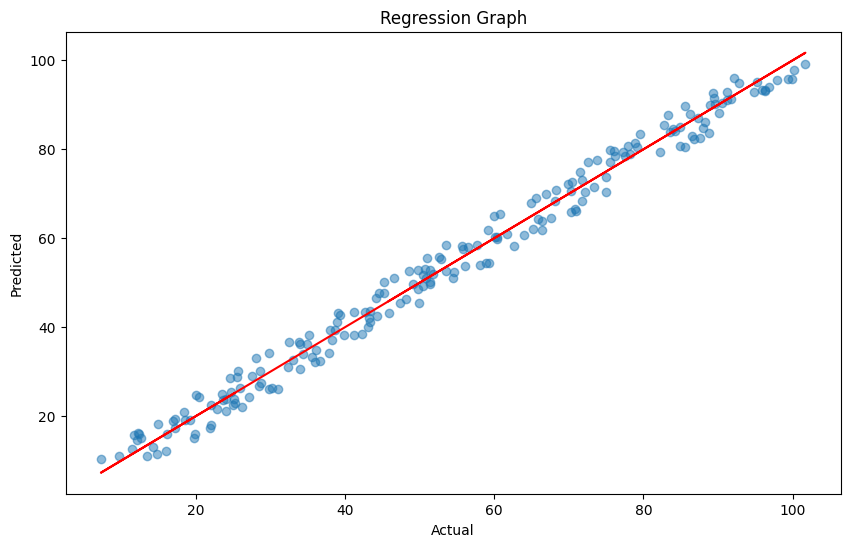

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Regression Graph")

plt.plot(y_test, y_test, 'r')

plt.show()

In [83]:
df_res = pd.DataFrame({'y_test': sorted(y_test), 'y_predicted': sorted(y_pred)})

In [84]:
df_res.index = range(1, len(df_res) + 1)
print(df_res.head(10))

    y_test  y_predicted
1     7.26    10.363470
2     9.71    10.990319
3    11.47    10.991089
4    11.66    11.483419
5    12.05    12.139014
6    12.24    12.668246
7    12.38    12.998258
8    12.64    14.585144
9    13.38    14.993435
10   14.24    15.107070


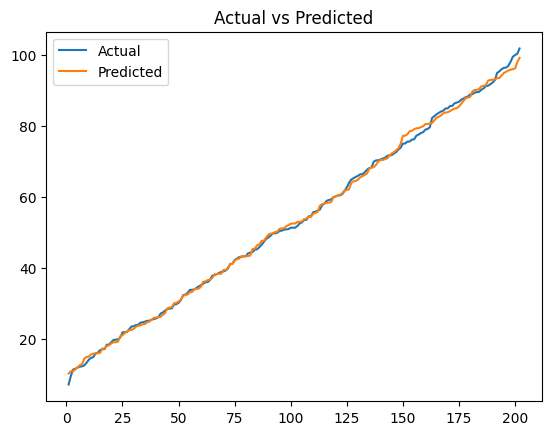

In [85]:
plt.plot(df_res['y_test'], label='Actual')
plt.plot(df_res['y_predicted'], label='Predicted')
plt.legend()
plt.title("Actual vs Predicted")
plt.show()

It can be seen that the similarity between the predicted results and the actual values indicates that the model performs well when evaluated using the test dataset.